In [13]:
import pandas as pd
import numpy as np

from utils.data_loader import load_from_tsfile_to_dataframe
from utils.regressor_tools import process_data
#import mlflow
#from tsfeatures import tsfeatures
np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None) 
from utils.personal_utils import *
from compression import *
from utils.compression_algos import *

import os
import matplotlib.pyplot as plt
from flaml_and_fwiz import *

In [14]:
# Run flaml for seeing output: bevore that start the mlflow server on 5001
path = '/home/sim/Desktop/TS Extrinsic Regression/data/prepared_data/AppliancesEnergy_TEST_ts_and_features.csv'
output = run_flaml(path, 'Trash', 'Test RSME output', 5)



2024/07/13 17:30:08 INFO mlflow.tracking.fluent: Experiment with name 'Trash' does not exist. Creating a new experiment.


featurewiz is given 0.9 as correlation limit...
    Skipping feature engineering since no feature_engg input...
    final list of category encoders given: ['label', 'label']
    final list of scalers given: []
Loaded input data. Shape = (42, 4368)
#### Starting featurewiz transform for train data ####
    Regression models don't need targets to be transformed to numeric...
    Single_Label Regression problem 
Shape of dataset: (42, 4368). Now we classify variables into different types...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Time taken to fit dataset = 1 second(s)
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (42, 4368)
    Single_Label Regression problem 
Starting SULOV with 4102 features...
    there are no null values in dataset...
    there are no null values in target column...
Completed SULOV. 1175 features selected
Performing recursive XGBoost feature selection from 

KeyboardInterrupt: 

Evaluate and visualize the output from the run on the server and the compression:

In [15]:
path = '/home/sim/Desktop/TS Extrinsic Regression/data/RegRSMEvsCompRatio/'
data = np.load(path +'rsme_compRatio.npz')

rmse_values = data['rmse_values']
comp_ratios = data['comp_ratios']


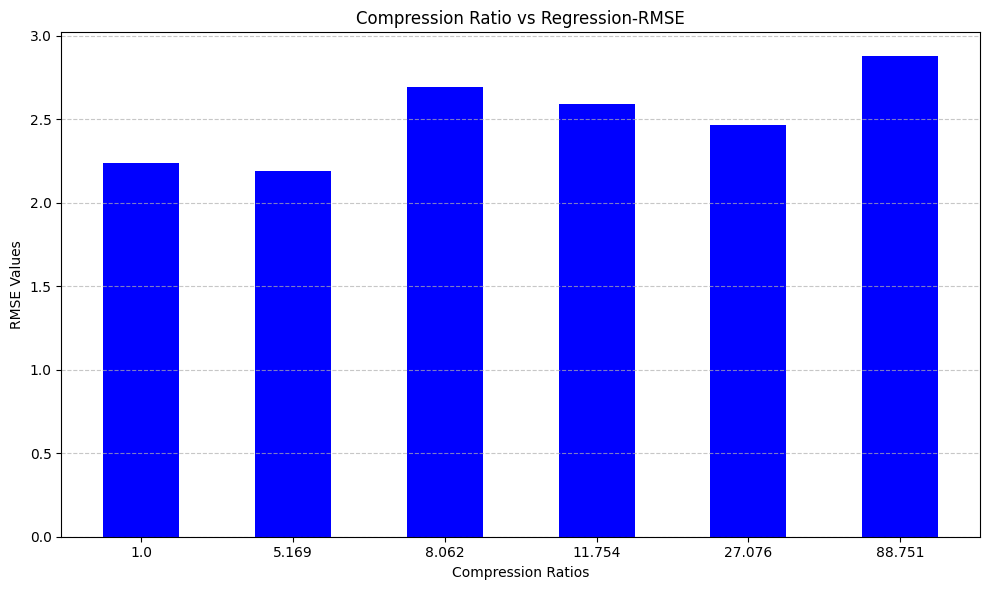

In [29]:
path = '/home/sim/Desktop/TS Extrinsic Regression/data/RegRSMEvsCompRatio/'
data = np.load(path + 'rsme_compRatio.npz')

rmse_values = data['rmse_values']
comp_ratios = data['comp_ratios']
comp_ratios = np.round(comp_ratios, 3)

# Create the bar graph using index positions for x-axis
plt.figure(figsize=(10, 6))
plt.bar(range(len(comp_ratios)), rmse_values, color='blue', width=0.5)
plt.xlabel('Compression Ratios')
plt.ylabel('RMSE Values')
plt.title('Compression Ratio vs Regression-RMSE')
plt.xticks(range(len(comp_ratios)), comp_ratios)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


Test to see if the compression code still works properly
What we should get:
- Imcreasing RSME and Compression Ratio
- RSME of dropout 0 should be nearly zero. RSME for dropout 1 should be around 1.
- Compression Ratio should make sense! Super high for dropout_value close to 1. For droput_value around 0.8, 0.9 Ratio of 3 to 5.
- dct has alredy good comp_ratio for i = 0.0 because of quantization.


In [2]:
test_compression()

216it [00:00, 10707.60it/s]
100%|██████████| 202/202 [00:00<00:00, 2448.91it/s]


+++ FloodModeling1 +++
$$$ dct $$$
RMSE
0.00  0.006274032499670094
0.04  0.006935093895659105
0.08  0.010768881666473358
0.12  0.017199174444292864
0.16  0.025577690263580678
0.20  0.03515986466589614
0.24  0.046214811460719575
0.28  0.058080890740497576
0.32  0.07127562721879624
0.36  0.08560826743048223
0.40  0.10067339209565142
0.44  0.1172254492758263
0.48  0.13450712789881258
0.52  0.1534175933418722
0.56  0.1732032121023388
0.60  0.1950292134963751
0.64  0.21815607297563913
0.68  0.2437608938752914
0.72  0.2718064225162032
0.76  0.3023937676200057
0.80  0.33854994453632614
0.84  0.3811509600139657
0.88  0.43660336054342097
0.92  0.5131839530911695
0.96  0.6386861417860717
1.00  1.0


Comp-Ratio
0.00  1.8424929036775832
0.04  1.8516852238168247
0.08  1.8737489985630174
0.12  1.898079326025068
0.16  1.930507697346872
0.20  1.9722393253915138
0.24  2.0161736132016093
0.28  2.0696116300301988
0.32  2.130478159656454
0.36  2.20366714525006
0.40  2.286703085231858
0.44  2.3876006676065

/home/sim/Desktop/TS Extrinsic Regression/TSER Code/compression.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  array_flatdim_coeff[:,i] = np.array(coeff_list)


0.08  0.5298214703079772
0.12  0.5484111092087927
0.16  0.5703281943697189
0.20  0.5945182596906888
0.24  0.6220805539137043
0.28  0.6525335907814673
0.32  0.6872641619440751
0.36  0.7262645281493676
0.40  0.7698569443138238
0.44  0.8219635057262874
0.48  0.8801242421527342
0.52  0.9504231384488364
0.56  1.031451912105451
0.60  1.1319853110643332
0.64  1.2504434166419145
0.68  1.4007738451739251
0.72  1.5991708180032342
0.76  1.8544584985211756
0.80  2.203733062127965
0.84  2.717858855646143
0.88  3.5846247415156305
0.92  5.167134240426427
0.96  9.538192646297256
1.00  326.70953436807093




$$$ dwt $$$
RMSE
0.00  6.572596242129255e-16
0.04  6.572596242129255e-16
0.08  6.572596242129255e-16
0.12  6.572596242129255e-16
0.16  6.572596242129255e-16
0.20  6.572596242129255e-16
0.24  6.572596242129255e-16
0.28  6.572596242129255e-16
0.32  8.911307321641015e-06
0.36  0.0001301479619372805
0.40  0.0005014920125440056
0.44  0.0012832018310334002
0.48  0.0028365160436743114
0.52  0.005190893872

66it [00:01, 56.87it/s] 
100%|██████████| 42/42 [00:00<00:00, 566.49it/s]


+++ AppliancesEnergy +++
$$$ dct $$$
RMSE
0.00  0.00640419263916621
0.04  0.006409175324841004
0.08  0.00663094586725514
0.12  0.0074045921389583585
0.16  0.008880953849950843
0.20  0.01084628618474862
0.24  0.01326502084415076
0.28  0.01621357481896293
0.32  0.019471185253031705
0.36  0.02309876052735807
0.40  0.027221807768175087
0.44  0.03162035059920456
0.48  0.036387637170388766
0.52  0.041719065407272035
0.56  0.04738455994277475
0.60  0.0536230282038452
0.64  0.06072920477657591
0.68  0.06850644727212453
0.72  0.07740721946698884
0.76  0.08814803502339795
0.80  0.10130865671866987
0.84  0.11939142941826988
0.88  0.14806464971819183
0.92  0.1964391535014975
0.96  0.29729375079702286
1.00  0.9990079365079365


Comp-Ratio
0.00  3.9482928515861353
0.04  3.961602063000139
0.08  3.9911168325828754
0.12  4.031888288012617
0.16  4.083235995232419
0.20  4.151168708422698
0.24  4.240839543462653
0.28  4.339438733826072
0.32  4.45706646891222
0.36  4.58514240591038
0.40  4.729627865559444


/home/sim/Desktop/TS Extrinsic Regression/TSER Code/compression.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  array_flatdim_coeff[:,i] = np.array(coeff_list)


1.00  0.9990079365079365


Comp-Ratio
0.00  0.8529032097443782
0.04  0.8752772100153295
0.08  0.9028862917285465
0.12  0.9349999112990056
0.16  0.9722390529152258
0.20  1.01328634408141
0.24  1.0594017153486128
0.28  1.1131424393810163
0.32  1.1722155119023585
0.36  1.2395379549895071
0.40  1.3179583357377807
0.44  1.407321216204281
0.48  1.511448916654534
0.52  1.6379016064257028
0.56  1.7845214220601642
0.60  1.9615880123220686
0.64  2.180747893783678
0.68  2.4542123361272297
0.72  2.8051528538032287
0.76  3.2907181142297275
0.80  3.937288817377313
0.84  4.891010586278527
0.88  6.470309932574083
0.92  9.412927599945048
0.96  17.41876191686793
1.00  590.6612068965517




$$$ dwt $$$
RMSE
0.00  5.040426526181978e-16
0.04  5.9936185917228813e-05
0.08  0.00022562168391515022
0.12  0.0005065031573571895
0.16  0.0009068448209922664
0.20  0.00143585406301341
0.24  0.0021136602076584562
0.28  0.0029188745445709826
0.32  0.003894882641346664
0.36  0.0050639930089214965
0.40  0.006413852699226

5072it [00:11, 453.67it/s]
100%|██████████| 5048/5048 [00:05<00:00, 956.84it/s] 


+++ BeijingPM25Quality +++
$$$ dct $$$
RMSE
0.00  0.006296655226801784
0.04  0.006767491197033571
0.08  0.009779098648530462
0.12  0.015174618387245507
0.16  0.022436521356719908
0.20  0.030842558023504028
0.24  0.04036997033062279
0.28  0.05118556973264827
0.32  0.06273464099704099
0.36  0.07526279945574325
0.40  0.08908632733425607
0.44  0.1035837257241737
0.48  0.11916205385264451
0.52  0.1363012633924039
0.56  0.15422719821634923
0.60  0.1734595226762815
0.64  0.1947504823889541
0.68  0.21730982158413797
0.72  0.24200346925785005
0.76  0.270243568445171
0.80  0.3017254963179742
0.84  0.3389340440091282
0.88  0.38641056722499406
0.92  0.44866441319583866
0.96  0.5428084649958498
1.00  0.8947437929212063


Comp-Ratio
0.00  3.610917276454746
0.04  3.6256204589715284
0.08  3.661167796305123
0.12  3.711906039810898
0.16  3.7759993690199685
0.20  3.849015960322367


KeyboardInterrupt: 

In [ ]:
data_path = "/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts"
dataset_array = load_dataset(data_path)
dataset_id = os.path.basename(data_path).split('_')[0]

66it [00:01, 62.48it/s] 
100%|██████████| 42/42 [00:00<00:00, 642.88it/s]


In [ ]:
# Check if RMSE increases with increasing dropout_ratio
for i in np.arange(0, 1.04, 0.1):
    decompressed_dataset = compress_dataset(dataset_array.copy(), dataset_id, True, "dwt", i) 
    print(i, " " ,compute_avg_rmse_of_dataset(dataset_array, decompressed_dataset))



0.0   5.040426526181978e-16
0.1   0.0003464869636634713
0.2   0.00143585406301341
0.30000000000000004   0.0033854854425775997
0.4   0.006413852699226404
0.5   0.010901034462780138
0.6000000000000001   0.017593535240536886
0.7000000000000001   0.02851264206464209
0.8   0.050581594666246836
0.9   0.11883603009165886
1.0   0.9990079365079365


In [ ]:
# Check that Compression Ratio increases with increasing dropout_ratio
for i in np.arange(0, 1, 0.1):
    decompressed_dataset = compress_dataset(dataset_array.copy(), dataset_id, False, "dwt", i) 
    print(calculateCompRatio(dataset_array, decompressed_dataset))


0.6557218120307587
0.695904811237393
0.7639262706516431
0.8564384095877723
0.9828960392488775
1.16226921432788
1.4336497055980315
1.8868002985099288
2.7859338532475664
5.364644258097855


In [ ]:
# Test if reshaping from (len_flat_dim, dim) to (num_dp, len_ts, dim) is working
num_dp = 2
len_ts = 5
num_dim = 4

array = np.arange(num_dp * len_ts * num_dim).reshape(num_dp, len_ts, num_dim)
print(array)

# Reshape to (len_flat_dim, dim)
array_flatdim = array.reshape(num_dp * len_ts, num_dim)
print(array_flatdim)

# Put column after column. For gzip part.
print(array_flatdim.reshape(-1, order='F'))


# Reshape back to (num_dp, len_ts, dim)
array_back = array_flatdim.reshape(-1, len_ts, num_dim)
print(array_back)

print(array_back.flatten())

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]

 [[20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]
  [36 37 38 39]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]
 [32 33 34 35]
 [36 37 38 39]]
[ 0  4  8 12 16 20 24 28 32 36  1  5  9 13 17 21 25 29 33 37  2  6 10 14
 18 22 26 30 34 38  3  7 11 15 19 23 27 31 35 39]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]

 [[20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]
  [36 37 38 39]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
# Test binary conversion and compression
num_dp = 2
len_ts = 2
num_dim = 2

array = np.arange(num_dp * len_ts * num_dim).reshape(num_dp, len_ts, num_dim)
array_flat = array.reshape(num_dp * len_ts, num_dim)

# Test if .tobytes saves metadata of the np.array -> No it flattens the array row after row (and slice after slice), then just saves the content of the array as bytes!
print(array_flat.tobytes() == np.arange(8).tobytes())


byte_nparray = np.arange(5)
print(byte_nparray.dtype)

byte_nparray = byte_nparray.tobytes()

print(bytearray)
print(len(byte_nparray))

# len(byte-string) -> return number of bytes in byte-object!


True
int64
<class 'bytearray'>
40


Test if saving with tofile keeps the array the same!

In [ ]:
# Test Saving in Files

np.save('time_series.npy', train_x_p)
train_x_p[0][0][0].dtype


flattened = train_x_p.flatten()
flattened.tofile("data.bin")

train_after = np.fromfile("data.bin", dtype=train_x_p[0][0][0].dtype)
train_after.shape
if np.array_equal(flattened, train_after):
    print("The arrays have the same content.")
else:
    print("The arrays do not have the same content.")

NameError: name 'train_x_p' is not defined

In [ ]:
# Only preparing Data for Testing!

def prepare_data(data_x_p, data_y):

    # Swap the dimensions so that columns are stacked after each other. Copy since swapaxes only returns a view
    #(95, 144, 24) -> (95, 24, 144), first column gets first row etc. One Row is the ts of the belonging dimension.
    data_swapped = data_x_p.swapaxes(1, 2).copy()

    # Reshape to flattened ts. Stack the rows behind the other for each slice.
    data_x_flattend = data_swapped.reshape(data_swapped.shape[0], -1)
    

    prep_data = pd.DataFrame(data_x_flattend)
    prep_data['target'] = data_y
    prep_data.columns = prep_data.columns.astype(str) #fwiz or flaml needs string as columns!

   
    #data_x_p = data_x_p[0:2,...]

    num_datapoints = data_x_p.shape[0]
    len_timeseries = data_x_p.shape[1]
    num_dimensions = data_x_p.shape[2]
    num_features = 38

    all_features = np.ndarray((num_datapoints, num_features * num_dimensions))

    for i in range(0, num_datapoints):
        start_index = 0

        for j in range(0, num_dimensions):
            curr_ts = data_x_p[i,:,j]

            #print(curr_ts.size)

            timeseries_df = pd.DataFrame({'unique_id' : np.ones(len_timeseries),'ds': np.arange(0, len_timeseries) , 'y': curr_ts})
            
            feature_array = tsfeatures(timeseries_df, freq=1).fillna(0).values

            #print(feature_array.size)
            #print(np.isnan(feature_array).sum())

            end_index = start_index + feature_array.size
            all_features[i, start_index: end_index] = feature_array
            start_index = end_index
        

    all_features = pd.DataFrame(all_features)

    # name the features
    for i, col in enumerate(all_features.columns):
        # Generate the new column name
        new_col_name = 'f' + str(i + 1)
        # Rename the column
        all_features.rename(columns={col: new_col_name}, inplace=True)



    ts_and_features = pd.concat([prep_data, all_features], axis=1)


    all_features['target'] = data_y

    ts_and_features = pd.concat([prep_data.drop(columns=['target']), all_features], axis=1)
    
    #prep_data.columns = prep_data.columns.astype(str)

    return ts_and_features, all_features

Test preparing part function of load_and_prepare_everything

In [ ]:
# Simple test:
#-> No a perfect test, but it seems to work! I have no idea about better tests!

len_ts = 3
ts_1_v = np.arange(len_ts)
np.random.seed(42)  # For reproducibility
ts_2_v = np.random.rand(len_ts)
x = np.linspace(0, 2 * np.pi, len_ts)
ts_3_v = np.sin(x)

ts_4_v =  ts_1_v + 0.2 * ts_2_v


# Reulting Feature matrix
ts_1 = pd.DataFrame({'unique_id' : np.ones(len_ts),'ds': np.arange(0,len_ts) , 'y': ts_1_v})
ts_2 = pd.DataFrame({'unique_id' : np.ones(len_ts),'ds': np.arange(0,len_ts) , 'y': ts_2_v})
ts_3 = pd.DataFrame({'unique_id' : np.ones(len_ts),'ds': np.arange(0,len_ts) , 'y': ts_3_v})
ts_4 = pd.DataFrame({'unique_id' : np.ones(len_ts),'ds': np.arange(0,len_ts) , 'y': ts_4_v})

feature_matrix = np.vstack((tsfeatures(ts_1, freq=1).fillna(0).values, tsfeatures(ts_2, freq=1).fillna(0).values, tsfeatures(ts_3, freq=1).fillna(0).values,tsfeatures(ts_4, freq=1).fillna(0).values))
#print(feature_matrix)


layer1 = np.stack((ts_1_v, ts_2_v), axis=1)
layer2 = np.stack((ts_3_v,ts_4_v), axis=1)

input = np.stack((layer1, layer2), axis=0)


print(input)
print(feature_matrix)
tsf, f = prepare_data(input, np.arange(2))
print(tsf)
#print(f)


[[[ 0.00000000e+00  3.74540119e-01]
  [ 1.00000000e+00  9.50714306e-01]
  [ 2.00000000e+00  7.31993942e-01]]

 [[ 0.00000000e+00  7.49080238e-02]
  [ 1.22464680e-16  1.19014286e+00]
  [-2.44929360e-16  2.14639879e+00]]]
[[ 1.00000000e+00  5.00000000e-01  3.00000000e+00  4.44089210e-16
   3.33333333e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.35200499e+02  0.00000000e+00  9.99999985e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00 -0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  6.66801831e-01  3.00000000e+00 -2.75921612e+00
   3.33333333e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  

In [ ]:
# Create Sample TS
linear_data = linear_data = np.arange(360).reshape(3, 30, 4)  # Creates an array with values from 0 to 1199
linear_data

np.random.seed(42)  # For reproducibility
random_data = np.random.rand(3, 30, 4)
random_y = np.random.rand(3)
random_data

prepare_data(linear_data, random_y)

(     0    1    2    3    4    5    6    7    8    9  ...      f144  f145  \
 0    0    4    8   12   16   20   24   28   32   36  ...  0.521199   1.0   
 1  120  124  128  132  136  140  144  148  152  156  ...  0.521199   1.0   
 2  240  244  248  252  256  260  264  268  272  276  ...  0.521199   1.0   
 
    f146  f147      f148      f149      f150      f151     f152    target  
 0   1.0   0.9  2.931081 -0.360864  0.333636 -0.568267  0.53624  0.388170  
 1   1.0   0.9  2.931081 -0.360864  0.333636 -0.568267  0.53624  0.643288  
 2   1.0   0.9  2.931081 -0.360864  0.333636 -0.568267  0.53624  0.458253  
 
 [3 rows x 273 columns],
     f1        f2    f3   f4        f5   f6   f7   f8        f9  f10  ...  \
 0  1.0  0.985647  30.0  0.0  1.098661  0.0  0.0  0.0  1.290323  0.0  ...   
 1  1.0  0.985647  30.0  0.0  1.098661  0.0  0.0  0.0  1.290323  0.0  ...   
 2  1.0  0.985647  30.0  0.0  1.098661  0.0  0.0  0.0  1.290323  0.0  ...   
 
        f144  f145  f146  f147      f148      f14